   OrderID  CustomerID     Product  Quantity    Price  OrderDate Region  \
0        1         413    Keyboard         5  1815.96 2023-01-01  South   
1        2         500  Smartphone         6  1497.86 2023-01-02  South   
2        3         925  Smartphone         1   465.75 2023-01-03  North   
3        4          55     Monitor         3  1896.86 2023-01-04   East   
4        5         502  Smartphone         5  1725.11 2023-01-05  South   

   TotalRevenue  
0       9079.80  
1       8987.16  
2        465.75  
3       5690.58  
4       8625.55  


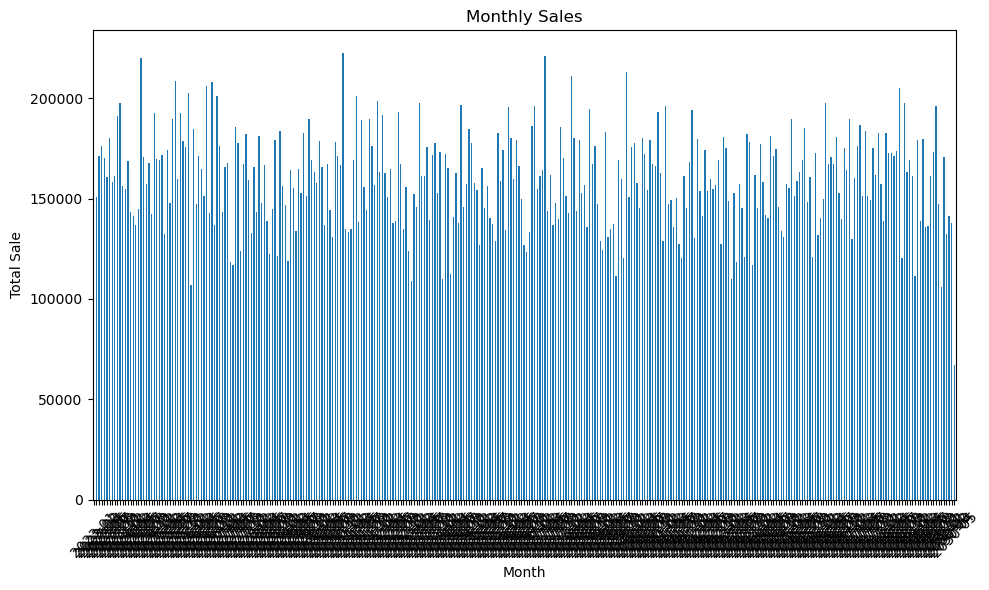

In [6]:
import pandas as pd

# Load Excel file
df = pd.read_excel('sales_data.xlsx')

# Preview data
print(df.head())
# Rename columns for consistency (optional)

df["Quantity"].fillna(0, inplace=True)
# Handle missing values
df = df.dropna()

# Add new column: total sale
df['TotalRevenue'] = df['Quantity'] * df['Price']
import matplotlib.pyplot as plt

df.groupby(df['OrderDate'].dt.to_period('M'))['TotalRevenue'].sum().plot(kind='bar', figsize=(10, 6))
plt.title("Monthly Sales")
plt.ylabel("Total Sale")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Save transformed data to a CSV file
df.to_csv('transformed_sales_data.csv', index=False)


In [7]:
top_products = df.groupby('product_name')['total_sale'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sale")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



import seaborn as sns

sns.boxplot(data=df, x='region', y='total_sale')
plt.title("Sales Distribution by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'product_name'